In [1]:
# age
# sex : (1 = 남성, 0 = 여성)
# cp : 가슴통증형
# trestbps : 휴식기 혈압(mmHgon 입원)
# chol : mg/dl 단위의 혈청 콜레스테롤
# fbs : (혈당 > 120mg/dl) (1 = 참, 0 = 거짓)
# reestg : 휴식기 심전도 결과
# thalach(천식): 최대 심장 박동 달성
# exang : 운동 유도 협심증 (1 = 예, 0 = 아니요)
# old peak: 휴식에 상대적인 운동으로 인한 ST 우울증
# slope(기울기) : 피크 연습 ST 세그먼트의 기울기
# ca : 플로로소피에 의해 색칠된 주요 혈관 수(0-3)
# thal : 3 = 정상, 6 = 고정 결함, 7 = 가역 결함
# target(대상): 1 또는 0(1:병걸림,0:안걸림)

In [2]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np

## Scikit-Learn의 다양한 머신러닝 모듈을 불러옵니다.
## 분류 알고리즘 중에서 선형회귀, 서포트벡터머신, 랜덤포레스트, K-최근접이웃 알고리즘을 사용해보려고 합니다.
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier


In [3]:
data_x = pd.read_csv("C:/Users/Admin/Desktop/success/Python/taitanic/heart.csv")


In [4]:
data_y = data_x.drop(['age','sex','cp',	'trestbps','chol','fbs',	'restecg',	'thalach',	'exang'	,'oldpeak'	,'slope',	'ca','thal'], axis=1)

In [5]:
data_y

,target
0,1
1,1
2,1
3,1
4,1
...,...
298,0
299,0
300,0
301,0


In [6]:
#무작위로 데이터셋 분할하기
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(data_x, data_y, test_size=0.3)


In [7]:
X_train = X_train.drop(['target'], axis=1)
X_test = X_test.drop(['target'], axis=1)
X_train


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
158,58,1,1,125,220,0,1,144,0,0.4,1,4,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
190,51,0,0,130,305,0,1,142,1,1.2,1,0,3
199,65,1,0,110,248,0,0,158,0,0.6,2,2,1
214,56,1,0,125,249,1,0,144,1,1.2,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,61,0,0,130,330,0,0,169,0,0.0,2,0,2
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
46,44,1,2,140,235,0,0,180,0,0.0,2,0,2


In [8]:
X_train.info()
print('-'*50)
X_test.info()
print('-'*50)
y_train.info()
print('-'*50)
y_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 212 entries, 158 to 10
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       212 non-null    int64  
 1   sex       212 non-null    int64  
 2   cp        212 non-null    int64  
 3   trestbps  212 non-null    int64  
 4   chol      212 non-null    int64  
 5   fbs       212 non-null    int64  
 6   restecg   212 non-null    int64  
 7   thalach   212 non-null    int64  
 8   exang     212 non-null    int64  
 9   oldpeak   212 non-null    float64
 10  slope     212 non-null    int64  
 11  ca        212 non-null    int64  
 12  thal      212 non-null    int64  
dtypes: float64(1), int64(12)
memory usage: 23.2 KB
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 91 entries, 152 to 114
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       91 non-

####  heart데이터는 결측치가 하나도 없구나..

### 머신러닝 알고리즘 적용하기

In [9]:
from sklearn.metrics import accuracy_score

In [10]:
#로짓
logreg = LogisticRegression()

logreg.fit(X_train,y_train)

Y_pred = logreg.predict(X_test)

accuracy_score(y_test, Y_pred)
# logreg.score(X_test, y_train)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8461538461538461

In [13]:
#서포트 벡터머신
svc = SVC()

svc.fit(X_train,y_train)

Y_pred = svc.predict(X_test)

accuracy_score(y_test, Y_pred)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


0.6373626373626373

In [14]:
###랜덤 포레스트
random_forest = RandomForestClassifier(n_estimators=100) #100개의 트리로 이루어진
random_forest.fit(X_train, y_train)

Y_pred = random_forest.predict(X_test)

accuracy_score(y_test, Y_pred)

<ipython-input-14-8be5a0ce1b68>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_forest.fit(X_train, y_train)


0.8131868131868132

In [15]:
random_forest.feature_importances_

array([0.08092535, 0.03930481, 0.1299159 , 0.07343474, 0.08673876,
       0.0090499 , 0.01979973, 0.11581636, 0.06160815, 0.09888503,
       0.04468716, 0.11762471, 0.1222094 ])

In [16]:
X_train.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')

### 시각화 하기

In [19]:
import matplotlib.pyplot as plt
import numpy as np

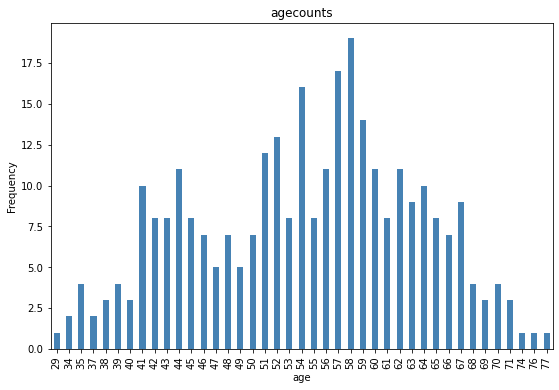

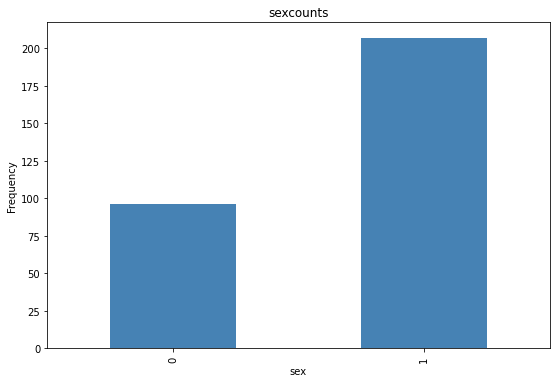

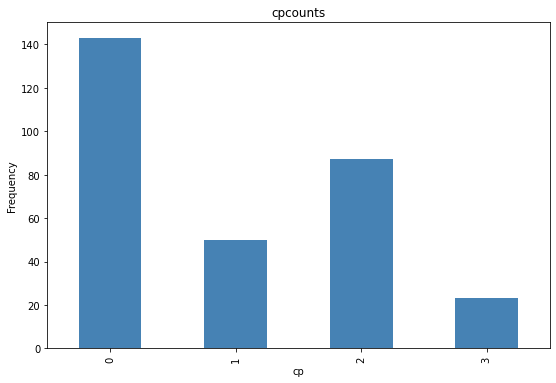

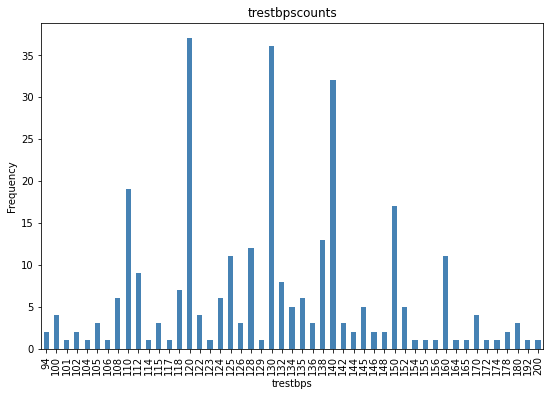

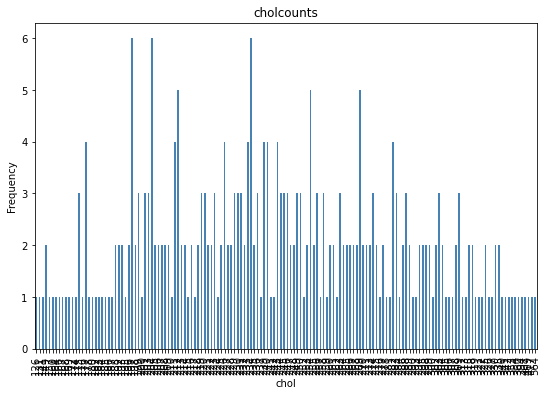

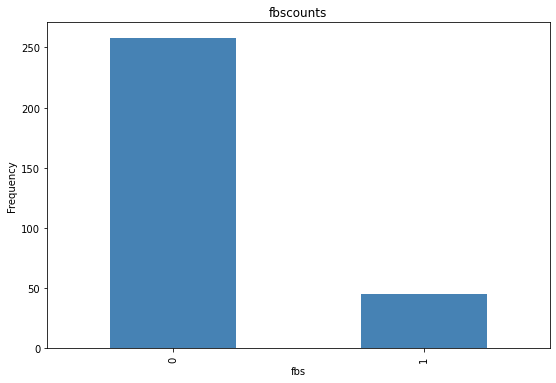

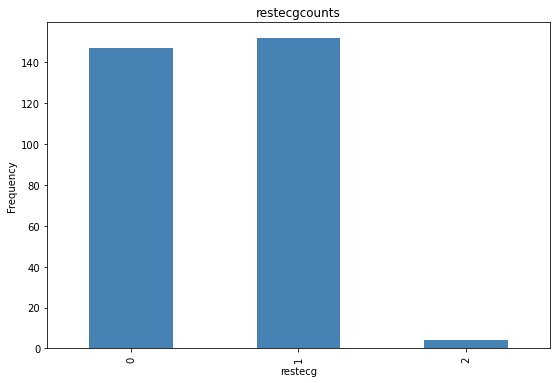

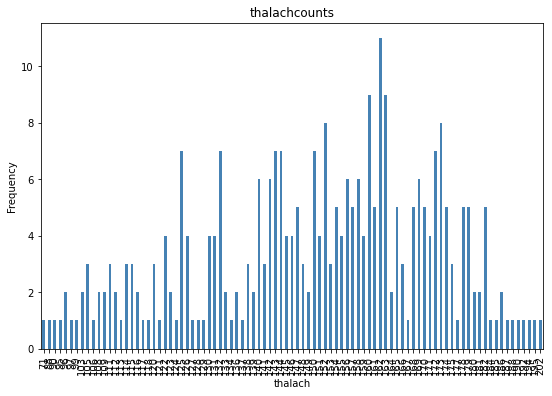

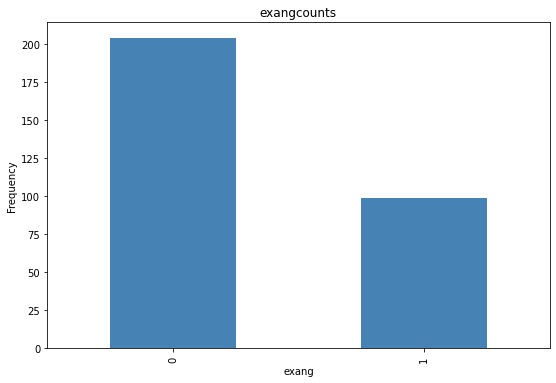

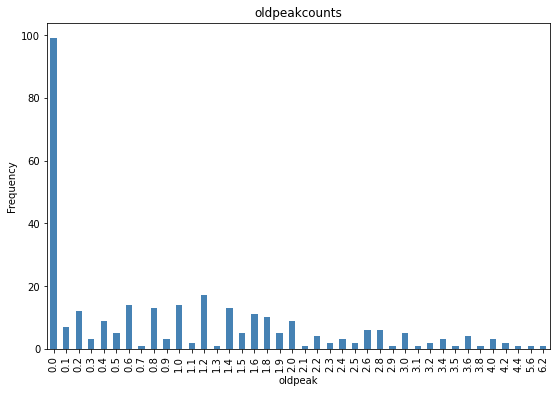

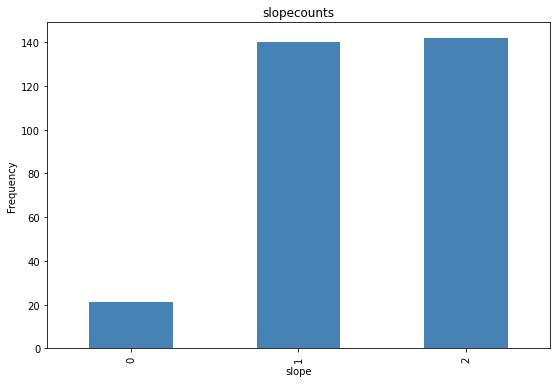

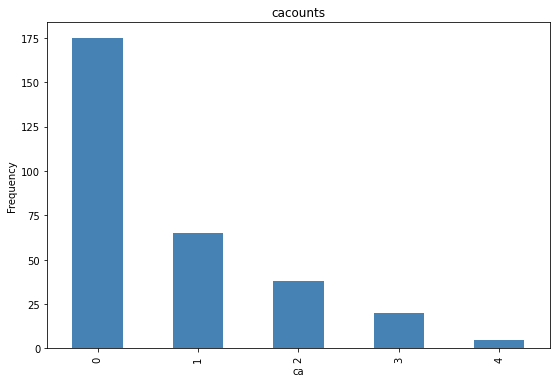

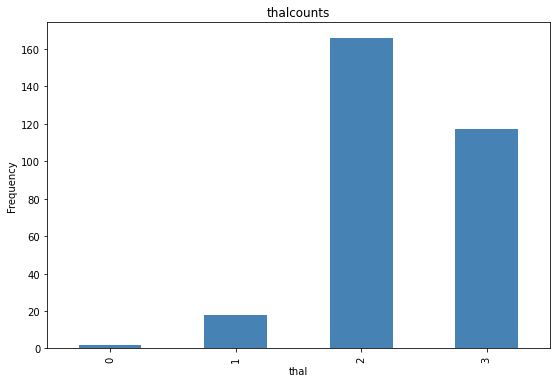

In [21]:
Categorical_features=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal']

for col in Categorical_features:
    counts = data_x[col].value_counts().sort_index()
    fig = plt.figure(figsize=(9,6))
    ax = fig.gca()
    counts.plot.bar(ax =ax, color = 'steelblue')
    ax.set_title(col+ 'counts')
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')
plt.show()

In [ ]:
import matplotlib.pyplot as plt

%matplotlib inline

plt.scatter(y_test, Y_predic)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()